<a href="https://colab.research.google.com/github/bhanu-4290/ML-AI/blob/main/Fashion_MNIST_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import keras
from keras.datasets import fashion_mnist

In [ ]:
(X_train , y_train), (X_test, y_test)= fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [ ]:
X_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  0,   0,   0,   0, 200, 222, 209, 203, 215, 200,   0,  70,  98,
          0, 103,  59,  68,  71,  49,   0, 219, 206, 214, 210, 250,  38,
          0,   0],
       [  0,   0,   0,   0, 247, 218, 212, 210, 215, 214,   0, 254, 243,
        139, 255, 174, 251, 255, 205,   0, 215, 217, 214, 208, 220,  95,
          0,   0],
       [  0,   0,   0,  45, 226, 214, 214, 215, 224, 205,   0,  42,  35,
         60,  16,  17,  12,  13,  70,   0, 189, 216, 212, 206, 212, 156,
          0,   0],
       [  0,   0,   0, 164, 235, 214, 211, 220, 216, 201,  52,  71,  89,
         94,  83,  78,  70,  76,  92,  87, 206, 207, 222, 213, 219, 208,
          0,   0],
       [  0,   0,   0, 106, 187, 223, 237, 248, 211, 198, 252, 250, 248,
        245, 248, 252, 253, 250, 252, 239, 201, 212, 225, 215, 193, 113,
          0,   0],
       [  0,   0,   0,   0,   0,  17,  54, 159, 222, 193, 208, 192, 197,
        200, 200, 200, 200, 201, 203, 195, 210, 165,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  47, 225, 192, 214, 203, 206,
        204, 204, 205, 206, 204, 212, 197, 218, 107,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   6,   0,  46, 212, 195, 212, 202, 206,
        205, 204, 205, 206, 204, 212, 200, 218,  91,   0,   3,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,  11, 197, 199, 205, 202, 205,
        206, 204, 205, 207, 204, 205, 205, 218,  77,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,   0,   2, 191, 198, 201, 205, 206,
        205, 205, 206, 209, 206, 199, 209, 219,  74,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 188, 197, 200, 207, 207,
        204, 207, 207, 210, 208, 198, 207, 221,  72,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 215, 198, 203, 206, 208,
        205, 207, 207, 210, 208, 200, 202, 222,  75,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 212, 198, 209, 206, 209,
        206, 208, 207, 211, 206, 205, 198, 221,  80,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 201, 205, 208, 207,
        205, 211, 205, 210, 210, 209, 195, 221,  96,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 202, 201, 205, 209, 207,
        205, 213, 206, 210, 209, 210, 194, 217, 105,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 204, 205, 208, 207,
        205, 215, 207, 210, 208, 211, 193, 213, 115,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 204, 207, 207, 208, 206,
        206, 215, 210, 210, 207, 212, 195, 210, 118,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 198, 208, 208, 208, 204,
        207, 212, 212, 210, 207, 211, 196, 207, 121,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   

In [ ]:
X_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  22, 118,  24,   0,
          0,   0,   0,   0,  48,  88,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  12, 100, 212, 205, 185,
        179, 173, 186, 193, 221, 142,  85,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  85,  76, 199, 225,
        248, 255, 238, 226, 157,  68,  80,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  91,  69,  91, 201,
        218, 225, 209, 158,  61,  93,  72,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  79,  89,  61,  59,
         87, 108,  75,  56,  76,  97,  73,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  75,  89,  80,  80,
         67,  63,  73,  83,  80,  96,  72,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  77,  88,  77,  80,
         83,  83,  83,  83,  81,  95,  76,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  89,  96,  80,  83,
         81,  84,  85,  85,  85,  97,  84,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  93,  97,  81,  85,
         84,  85,  87,  88,  84,  99,  87,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  95,  87,  84,  87,
         88,  85,  87,  87,  84,  92,  87,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  97,  87,  87,  85,
         88,  87,  87,  87,  88,  85, 107,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  17, 100,  88,  87,  87,
         88,  87,  87,  85,  89,  77, 118,   8,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  10,  93,  87,  87,  87,
         87,  87,  88,  87,  89,  80, 103,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   9,  96,  87,  87,  87,
         87,  87,  88,  87,  88,  87, 103,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  12,  96,  85,  87,  87,
         87,  85,  87,  87,  88,  89, 100,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  20,  95,  84,  88,  85,
         87,  88,  88,  88,  89,  88,  99,   8,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  21,  96,  85,  87,  85,
         88,  88,  88,  88,  89,  89,  99,  10,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  24,  96,  85,  87,  85,
         87,  88,  88,  89,  88,  91, 102,  14,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  25,  93,  84,  88,  87,
         87,  87,  87,  87,  89,  91, 103,  29,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  95,  85,  88,  88,
         87,  87,  87,  87,  89,  88, 102,  37,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  34,  96,  88,  87,  87,
         87,  87,  87,  87,  85,  85,  97,  38,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  40,  96,  87,  85,  87,
         87,  87,  87,  87,  85,  84,  92,  49,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  46,  95,  83,  84,  87,
         87,  87,  87,  87,  87,  84,  87,  84,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  72,  95,  85,  84,  85,
         88,  87,  87,  89,  87,  85,  83,  63,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
X_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,  33,  96, 175, 156,  64,
         14,  54, 137, 204, 194, 102,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  73, 186, 177, 183, 175, 188, 232,
        255, 223, 219, 194, 179, 186, 213, 146,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  35, 163, 140, 150, 152, 150, 146, 175,
        175, 173, 171, 156, 152, 148, 129, 156, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 150, 142, 140, 152, 160, 156, 146, 142,
        127, 135, 133, 140, 140, 137, 133, 125, 169,  75,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  54, 167, 146, 129, 142, 137, 137, 131,
        148, 148, 133, 131, 131, 131, 125, 140, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 110, 188, 133, 146, 152, 133, 125,
        127, 119, 129, 133, 119, 140, 131, 150,  14,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 221, 158, 137, 135, 123, 110,
        110, 114, 108, 112, 117, 127, 142,  77,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   4,   0,  25, 158, 137, 125, 119, 119,
        110, 117, 117, 110, 119, 127, 144,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 123, 156, 129, 112, 110,
        102, 112, 100, 121, 117, 129, 114,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 125, 169, 127, 119, 106,
        108, 104,  94, 121, 114, 129,  91,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   2,   0,  98, 171, 129, 112, 104,
        114, 106, 102, 112, 104, 133,  64,   0,   4,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   2,   0,  66, 173, 135, 129,  98,
        100, 119, 102, 108,  98, 135,  60,   0,   4,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   2,   0,  56, 171, 135, 127, 100,
        108, 117,  85, 106, 110, 135,  66,   0,   4,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  52, 150, 129, 110, 100,
         91, 102,  94,  83, 104, 123,  66,   0,   4,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   2,   0,  66, 167, 140, 148, 148,
        127, 137, 152, 146, 146, 148,  96,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  45, 123,  94, 104,  96,
        119, 121, 106,  98, 112,  87, 114,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 106,  89,  58,  50,  37,
         50,  66,  56,  50,  75,  75, 137,  22,   0,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,  29, 148, 114, 106, 125,  89,
        100, 133, 117, 131, 131, 131, 125, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 100, 106, 114,  91, 137,  62,
        102, 131,  89, 135, 112, 131, 108, 135,  37,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 146, 100, 108,  98, 144,  62,
        106, 131,  87, 133, 104, 160, 117, 121,  68,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  33, 121, 108,  96, 100, 140,  71,
        106, 127,  85, 140, 104, 150, 140, 114,  89,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  62, 119, 112, 102, 110, 137,  75,
        106, 144,  81, 144, 108, 117, 154, 117, 104,  18,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  66, 121, 102, 112, 117, 131,  73,
        104, 156,  77, 137, 135,  83, 179, 129, 121,  35,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 127,  81, 125, 133, 119,  79,
        100, 169,  83, 129, 175,  60, 163, 135, 146,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 10

In [ ]:
X_train[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  26,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 189, 206, 187,  32,   0,
          0,   0,  26, 217, 226, 196,  11,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 192, 227, 234, 243, 230,
        147, 239, 242, 234, 218, 209,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 173, 225, 215, 233, 254,
          0, 194, 240, 217, 221, 190,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 139, 229, 212, 226, 255,
          0, 162, 255, 213, 226, 200,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  98, 232, 211, 215, 249,
         46, 162, 246, 214, 230, 186,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  70, 228, 213, 220, 224,
        252, 239, 219, 217, 231, 171,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  45, 222, 214, 218, 216,
        210, 215, 217, 202, 224, 172,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  24, 254, 214, 210, 211,
        214, 215, 212, 203, 221, 167,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 254, 216, 215, 217,
        217, 216, 216, 206, 225, 150,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 247, 216, 214, 217,
        216, 214, 212, 203, 226, 136,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 245, 216, 214, 216,
        217, 215, 211, 204, 225, 125,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 247, 216, 214, 217,
        220, 217, 213, 203, 222, 147,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 248, 216, 215, 218,
        222, 216, 214, 207, 218, 179,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 249, 216, 217, 219,
        222, 217, 214, 210, 215, 211,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  38, 255, 214, 218, 219,
        224, 218, 215, 211, 211, 231,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  79, 227, 209, 219, 219,
        227, 219, 215, 213, 206, 254,  58,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 146, 226, 211, 220, 219,
        228, 218, 215, 216, 205, 219, 163,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 202, 221, 214, 221, 219,
        231, 218, 215, 218, 213, 212, 220,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 234, 217, 216, 220, 219,
        234, 217, 215, 218, 216, 223, 247,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  17, 254, 212, 219, 219, 220,
        233, 214, 216, 219, 222, 153, 238,  58,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  66, 255, 208, 220, 219, 222,
        241, 220, 218, 218, 218, 192, 242,  99,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 142, 235, 203, 218, 216, 231,
        242, 225, 233, 219, 214, 216, 238, 144,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 177, 248, 227, 229, 211, 255,
         76,   0, 247, 243, 230, 230, 249, 187,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]


In [ ]:
len(class_labels)

10

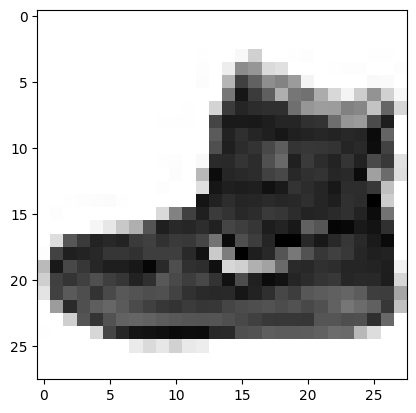

In [ ]:
plt.imshow(X_train[0],cmap="Greys")


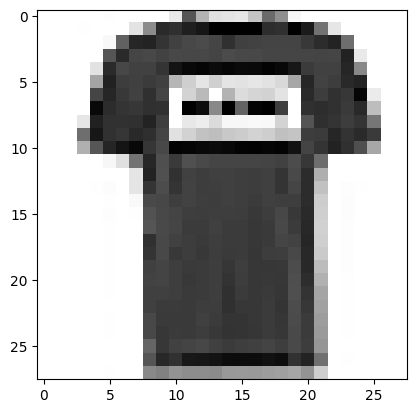

In [ ]:
plt.imshow(X_train[1],cmap="Greys")


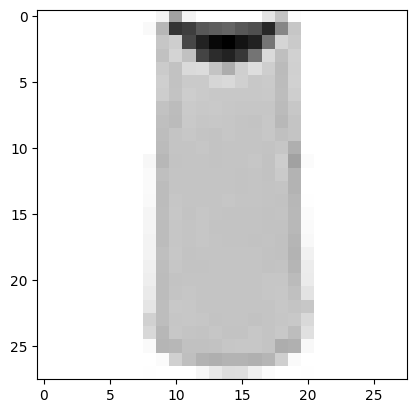

In [ ]:
plt.imshow(X_train[2],cmap="Greys")


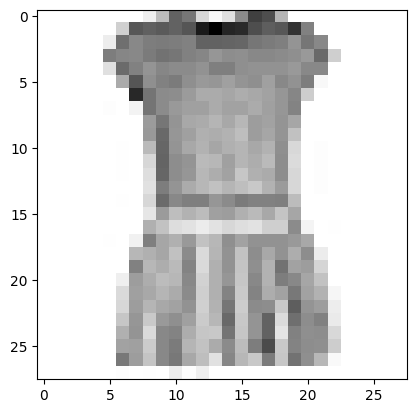

In [ ]:
plt.imshow(X_train[3],cmap="Greys")


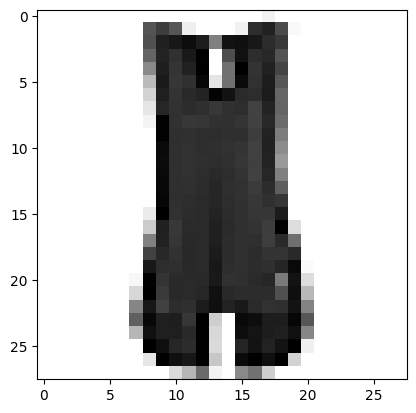

In [ ]:
plt.imshow(X_train[4],cmap="Greys")


In [ ]:
X_train.ndim,X_train.shape



(3, (60000, 28, 28))

In [ ]:
X_train = np.expand_dims(X_train,-1)
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test = np.expand_dims(X_test,-1)
X_test.shape

(10000, 28, 28, 1)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test.shape

(10000, 28, 28, 1)

In [ ]:
#scaling

In [ ]:
X_train = X_train/255
X_test = X_test/255
X_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [ ]:
#building thearch of cnn

model = keras.Sequential([
    #1 conv layer
     keras.layers.Conv2D(filters = 32, kernel_size = 3, strides = (1,1),padding = "valid", activation = "relu", input_shape = [28,28,1]),
     keras.layers.MaxPooling2D(pool_size = (2,2)),
     #2 nd con layer
     keras.layers.Conv2D(filters = 16, kernel_size = 3, strides = (1,1),padding = "valid", activation = "relu"),
     keras.layers.MaxPooling2D(pool_size = (2,2)),
    #flatnen layer
     keras.layers.Flatten(),
    #dense layer
     keras.layers.Dense(units = 128, activation = "relu"),
     #dense layer
    keras.layers.Dense(units=64, activation = "relu"),
    #output
    keras.layers.Dense(units = 10, activation = "softmax"),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        51,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,178 (254.60 KB)

 Trainable params: 65,178 (254.60 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer ='adam',
    loss ='sparse_categorical_crossentropy',
    metrics =['accuracy']
)


In [ ]:
 history = model.fit(
     X_train,
     y_train,
     epochs = 10,
     batch_size= 512,
     verbose=True,
     validation_data=(X_test,y_test),
 )

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 39s 313ms/step - accuracy: 0.5450 - loss: 1.3623 - val_accuracy: 0.7763 - val_loss: 0.5984
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 44s 341ms/step - accuracy: 0.8066 - loss: 0.5197 - val_accuracy: 0.8170 - val_loss: 0.4917
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 39s 321ms/step - accuracy: 0.8445 - loss: 0.4364 - val_accuracy: 0.8435 - val_loss: 0.4351
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 39s 307ms/step - accuracy: 0.8579 - loss: 0.3986 - val_accuracy: 0.8597 - val_loss: 0.3967
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 40s 301ms/step - accuracy: 0.8668 - loss: 0.3742 - val_accuracy: 0.8676 - val_loss: 0.3718
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 38s 320ms/step - accuracy: 0.8729 - loss: 0.3488 - val_accuracy: 0.8657 - val_loss: 0.3677
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 55s 463ms/step - accuracy: 0.8780 - loss: 0.3356 - val_accuracy: 0.8759 - val_loss: 0.3519
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 66s 324ms/step - accuracy: 0.8839 - loss: 0

In [ ]:
#predcit on the test data
model.predict(np.expand_dims(X_test[1], axis=0)).round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_pred = model.predict(X_test).round(2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [ ]:
model.evaluate(X_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8860 - loss: 0.3232


[0.32247450947761536, 0.8838000297546387]

In [ ]:
#save the mmodel
model.save('fashion_mnist_cnn.h5')

In [ ]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
 'T-shirt/top':0.1%
 'Trouser':90%,,
 'Pullover':2%,
 'Dress':1%,
 'Coat':0.5%,
 'Sandal':0.05%,
 'Shirt':1%,
 'Sneaker':0.001,
 'Bag':0.02,
 'Ankle boot':0.1%

SyntaxError: illegal target for annotation (ipython-input-43-2005390877.py, line 1)

In [ ]:
y_pred_labels=  [np.argmax(label) for label in y_pred]
y_pred_labels


[np.int64(9),
 np.int64(2),
 np.int64(1),
 np.int64(1),
 np.int64(6),
 np.int64(1),
 np.int64(4),
 np.int64(6),
 np.int64(5),
 np.int64(7),
 np.int64(4),
 np.int64(5),
 np.int64(5),
 np.int64(3),
 np.int64(4),
 np.int64(1),
 np.int64(2),
 np.int64(4),
 np.int64(8),
 np.int64(0),
 np.int64(2),
 np.int64(5),
 np.int64(7),
 np.int64(5),
 np.int64(1),
 np.int64(2),
 np.int64(6),
 np.int64(0),
 np.int64(9),
 np.int64(3),
 np.int64(8),
 np.int64(8),
 np.int64(3),
 np.int64(3),
 np.int64(8),
 np.int64(0),
 np.int64(7),
 np.int64(5),
 np.int64(7),
 np.int64(9),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(9),
 np.int64(4),
 np.int64(7),
 np.int64(2),
 np.int64(1),
 np.int64(2),
 np.int64(6),
 np.int64(4),
 np.int64(4),
 np.int64(5),
 np.int64(8),
 np.int64(2),
 np.int64(2),
 np.int64(8),
 np.int64(6),
 np.int64(8),
 np.int64(0),
 np.int64(7),
 np.int64(7),
 np.int64(8),
 np.int64(5),
 np.int64(1),
 np.int64(1),
 np.int64(3),
 np.int64(4),
 np.int64(7),
 np.int64(8),
 np.int64(7),
 np.in

In [ ]:
from sklearn.metrics import confusion_matrix
cnf = confusion_matrix(y_test,y_pred_labels)
cnf

array([[877,   0,  25,  35,   5,   5,  42,   0,  11,   0],
       [  2, 969,   0,  22,   3,   1,   1,   0,   2,   0],
       [ 19,   1, 859,  14,  74,   0,  32,   0,   1,   0],
       [ 20,   6,  12, 910,  29,   0,  20,   0,   3,   0],
       [  1,   1,  80,  33, 843,   0,  40,   0,   2,   0],
       [  0,   0,   0,   2,   0, 970,   0,  17,   0,  11],
       [193,   2, 107,  33, 109,   0, 538,   0,  18,   0],
       [  0,   0,   0,   0,   0,  23,   0, 938,   0,  39],
       [  1,   1,  11,   4,   4,   3,   5,   4, 967,   0],
       [  1,   0,   0,   0,   0,   4,   0,  29,   0, 966]])

In [ ]:
import seaborn as sns


<Axes: >

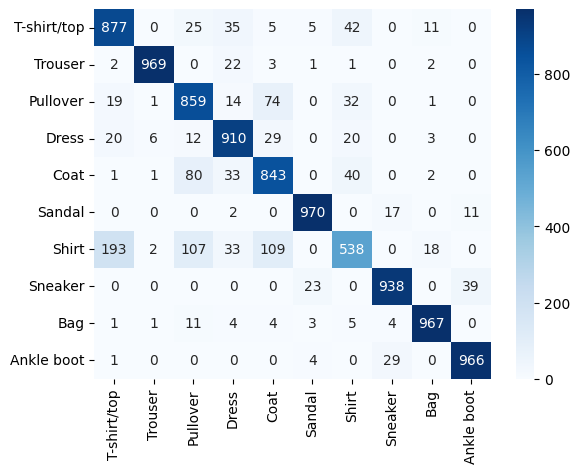

In [ ]:
sns.heatmap(cnf,annot=True,cmap="Blues",fmt="d", xticklabels=class_labels, yticklabels=class_labels)

In [ ]:
!pip install gradio


In [ ]:
import tensorflow as tf


In [ ]:
def predict_fashion(image):
    image = image.convert("L")  # Convert to grayscale
    image = image.resize((28, 28))  # Resize to match model input
    image = np.array(image) / 255.0  # Normalize
    image = np.expand_dims(image, axis=(0, -1))  # Add batch and channel dimension

    # Load the trained model
    model = tf.keras.models.load_model("fashion_mnist_cnn.h5")
    prediction = model.predict(image)
    predicted_class = class_labels[np.argmax(prediction)]
    return predicted_class

In [ ]:
import gradio as gr

In [ ]:
app = gr.Interface(
    fn = predict_fashion,
    inputs = gr.Image(type= "pil"),
    outputs =gr.Label(),
    title="Fashion MNIST Classifier",
    description="Upload a grayscale image of a fashion item (28x28 pixels), and the model will predict its category."

)


In [ ]:
app.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f24609208a79392d5b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
